In [1]:
# import libraries
import pydicom
import matplotlib.pyplot as plt
import os
from collections import Counter
import numpy as np
import pandas as pd
import pydicom

C:\Users\soman\AppData\Local\Temp\ipykernel_9948\2805067089.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Directory containing DICOM files
dicom_directory = 'files/'
group_number = 0x0002

# Get a list of all DICOM files in the directory
dicom_files = [os.path.join(dicom_directory, file) for file in os.listdir(dicom_directory) if file.endswith('.DCM')]
print(dicom_files)

['files/0002.DCM', 'files/0003.DCM', 'files/0004.DCM', 'files/0005.DCM', 'files/output.DCM']


In [7]:
# List to store all VR tags
all_vr_tags = []

# List to store all meta tags
all_meta_tags = []

# Iterate over each DICOM file
for file in dicom_files:
    # Load the DICOM file
    dataset = pydicom.dcmread(file, force=True)
    print(dataset)

    meta_dataset = dataset.file_meta
    # print(meta_dataset)

    # Extract the VR tag and value from the dataset
    vr_tags = [data_element.VR for data_element in dataset]
    # print(vr_tags)

    # Extract the VR meta tag and value from the meta_dataset
    vr_meta_tags = [meta_data_element.VR for meta_data_element in meta_dataset]
    # print(vr_meta_tags)

    all_vr_tags.extend(vr_tags)
    all_meta_tags.extend(vr_meta_tags)

# print(all_vr_tags)
# print(all_meta_tags)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 150
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0008, 0020) Study Date                          DA: '19941013'
(0008, 0030) Study Time                          TM: '141917'
(0008, 0050) Accession Number         

In [20]:
# Count the occurrences of each VR tag
vr_tags_counter = Counter(vr_tags)
print(vr_tags_counter)

Counter({'DS': 17, 'CS': 11, 'IS': 11, 'LO': 10, 'US': 7, 'UI': 6, 'SH': 5, 'DA': 4, 'TM': 3, 'PN': 2, 'LT': 1, 'OW': 1, 'OB': 1})


In [26]:
# Filter tags with occurrences greater than 3
filtered_tags_gt_3 = {tag: count for tag, count in vr_tags_counter.items() if count > 3}
print(filtered_tags_gt_3)

{'CS': 11, 'DA': 4, 'UI': 6, 'SH': 5, 'LO': 10, 'DS': 17, 'IS': 11, 'US': 7}


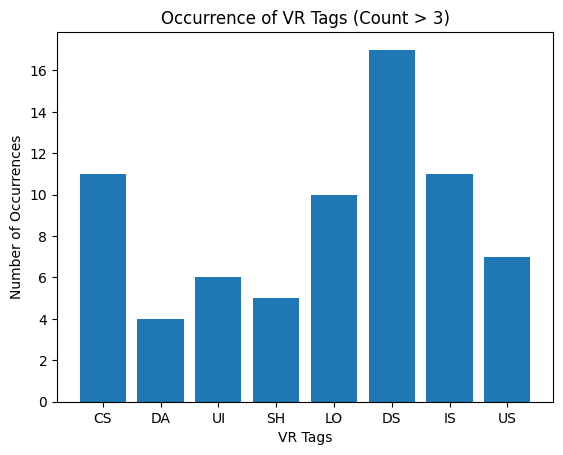

In [53]:
# Create lists for plotting
tags = list(filtered_tags_gt_3.keys())
occurrences = list(filtered_tags_gt_3.values())

# Create bar graph
plt.bar(tags, occurrences)
plt.xlabel('VR Tags')
plt.ylabel('Number of Occurrences')
plt.title('Occurrence of VR Tags (Count > 3)')

plt.yticks(np.arange(0, max(occurrences)+1, 2))

plt.show()

In [28]:
# Filter tags with occurrences less than or equal to 3
filtered_tags_lt_3 = {tag: count for tag, count in vr_tags_counter.items() if count <= 3}
print(filtered_tags_lt_3)

{'TM': 3, 'PN': 2, 'LT': 1, 'OW': 1, 'OB': 1}


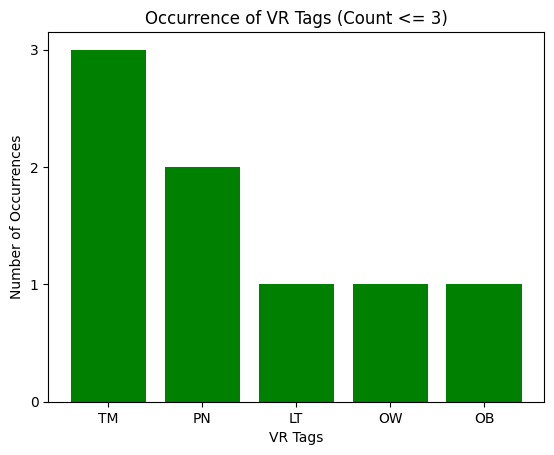

In [49]:
# Create lists for plotting
tags = list(filtered_tags_lt_3.keys())
occurrences = list(filtered_tags_lt_3.values())

# Create bar graph
plt.bar(tags, occurrences, color='green')
plt.xlabel('VR Tags')
plt.ylabel('Number of Occurrences')
plt.title('Occurrence of VR Tags (Count <= 3)')

plt.yticks(np.arange(0, max(occurrences)+1, 1))

plt.show()

In [41]:
# Count the occurrences of each VR tag
vr_tags_counter = Counter(vr_meta_tags)
print(vr_tags_counter)

Counter({'UI': 4, 'UL': 1, 'OB': 1, 'SH': 1})


In [44]:
# Filter meta tags with occurrences
filtered_meta_tags = {tag: count for tag, count in vr_tags_counter.items()}
print(filtered_meta_tags)

{'UL': 1, 'OB': 1, 'UI': 4, 'SH': 1}


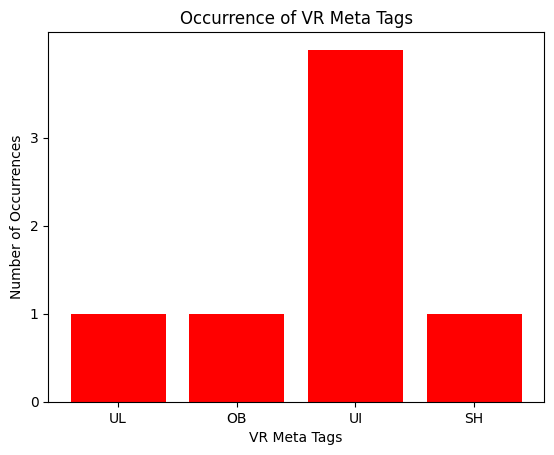

In [52]:
# Create lists for plotting
meta_tags = list(filtered_meta_tags.keys())
meta_occurrences = list(filtered_meta_tags.values())

# Create bar graph
plt.bar(meta_tags, meta_occurrences, color='red')
plt.xlabel('VR Meta Tags')
plt.ylabel('Number of Occurrences')
plt.title('Occurrence of VR Meta Tags')

plt.yticks(np.arange(0, max(occurrences)+1, 1))

plt.show()